## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
from sklearn.datasets import fetch_openml, fetch_20newsgroups
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import scipy
from scipy.spatial import distance
import numpy as np

from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from  sklearn.feature_extraction.text import TfidfVectorizer

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        pass
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    
    def predict(self, X_test):
        if self.algorithm == 'brute': 
            M = distance.cdist(X_test, self.X, 'euclidean')
            result = np.zeros(0)
            for element in M:
                d = dict(enumerate(element))
                sorted_d = sorted(d.items(), key=lambda x: x[1])
                cutoff = sorted_d[0 : self.n_neighbors]
                index = np.asarray(list(zip(*cutoff))[0])
                res = np.argmax(np.bincount(self.y[index]))
                result = np.append(result, res)
            return result
        if self.algorithm == 'kd_tree':
            result = np.zeros(0)
            tree = KDTree(X_train, leaf_size=2)
            dist, ind = tree.query(X_test, k=2) 
            for element in ind:
                res = np.argmax(np.bincount(y_train[element]))
                result = np.append(result, res)
            return result

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
 M = distance.cdist(X_test, X_train, 'euclidean')

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
my_clf.fit(X_train, y_train)

In [10]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [11]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [12]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [13]:
%time clf.predict(X_test)

Wall time: 2 ms


array([0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2])

In [14]:
%time my_clf.predict(X_test)

Wall time: 1 ms


array([0., 2., 0., 1., 0., 2., 0., 1., 0., 2., 2., 2., 1., 2., 2.])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [15]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [18]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [19]:
%time clf.predict(X_test)

Wall time: 2 ms


array([2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0])

In [20]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([2., 1., 1., 0., 1., 2., 2., 2., 1., 0., 0., 1., 1., 0., 0.])

In [21]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [22]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [23]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [25]:
kf = KFold(n_splits=3)
KFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:",test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

TRAIN: [ 3772  3773  3774 ... 11311 11312 11313] TEST: [   0    1    2 ... 3769 3770 3771]
TRAIN: [    0     1     2 ... 11311 11312 11313] TEST: [3772 3773 3774 ... 7540 7541 7542]
TRAIN: [   0    1    2 ... 7540 7541 7542] TEST: [ 7543  7544  7545 ... 11311 11312 11313]


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

best k= 0


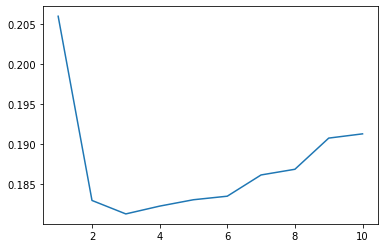

In [26]:
lst = np.zeros(0)
for k in range(0,10):
    clf = KNeighborsClassifier(n_neighbors = k + 1, algorithm='brute')
    cv_results = cross_validate(clf, X, target, cv=3)
    lst = np.append(lst, cv_results['test_score'].mean())
print("best k=", lst.argmax())
plt.plot(np.arange(1,11),lst)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

best k for cosine metric = 0


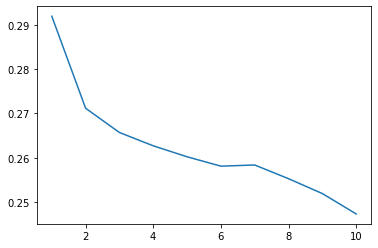

In [27]:
"""cosine_metric"""
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
lst = np.zeros(0)
for k in range(0,10):
    clf = KNeighborsClassifier(n_neighbors = k + 1, algorithm='brute', metric = 'cosine')
    cv_results = cross_validate(clf, X, target, cv=3)
    lst = np.append(lst, cv_results['test_score'].mean())
print("best k for cosine metric =", lst.argmax())
plt.plot(np.arange(1,11),lst)

best k for TfIdf  = 0


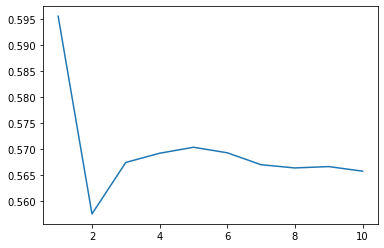

In [28]:
"""TfIdf"""
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(data)
lst = np.zeros(0)
for k in range(0,10):
    clf = KNeighborsClassifier(n_neighbors = k + 1, algorithm='brute', metric = 'cosine')
    cv_results = cross_validate(clf, X, target, cv=3)
    lst = np.append(lst, cv_results['test_score'].mean())
print("best k for TfIdf  =", lst.argmax())
plt.plot(np.arange(1,11),lst)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [29]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [30]:
data_test =  newsgroups['data']
target_test = newsgroups['target']

In [31]:
Vectorizer = TfidfVectorizer()
X_train = Vectorizer.fit_transform(data)
X_test = Vectorizer.transform(data_test)

In [32]:
clf = KNeighborsClassifier(n_neighbors = 1, algorithm= 'brute', metric = 'cosine')
clf.fit(X_train,target)
clf_pred = clf.predict(X_test)
accuracy_score(clf_pred, target_test)

0.5088953797132236

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

Да, отличается на 0.1. Одной из причин могло послужить различие в  темах  между  тестовой и
тренировочной выборками. Разные темы можно обучиться предсказывать с разной точностью в зависимости 
от интенсивности появления в них уникальных слов. (Словарь для научных статей гораздо шире, чем 
для текста про моду)